intercept using sklearn LR 0.4197872124714763
slope using sklearn LR [5.97434682]
m from Batch GD: 5.7400501787464675 c from batch GD: 7.898038792276819
m from Mini Batch GD: 5.98659301599897 c from Mini Batch GD: 0.5704590079702603
m from SGD: 5.98659301599897 c from SGD: 0.5704590079702603


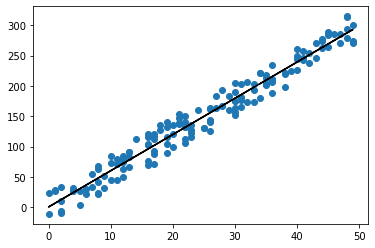

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from sklearn.linear_model import LinearRegression
X= np.random.randint(0,50,(150))
C= np.random.randint(-30,30,(150))
Y=[]
for i in range(150):
    k=6*X[i] + C[i]
    Y.append(k)
#printing the datas
plt.scatter(X,Y, label="data")
#Reshapping the array for doing linear regression
#fisrt input is number of rows and second input is number of columns
x=np.array(X).reshape((-1,1))
reg=LinearRegression().fit(x,Y)
#printing slope and intercept of the fit
print('intercept using sklearn LR', reg.intercept_)
print('slope using sklearn LR',reg.coef_)
#printing the datas with the fit
plt.plot
plt.plot(X, reg.predict(x), color='k')
#defining the cost function
#in every function x, y are input matrices, m,c are slope and intercept respectively
#defining functions
def cost_fn(x,y,C,m,c):
    k=0
    n=len(y)
    for i in range(n):
        k+=((y[i] - (m*(x[i][0]) + C[i]))*(y[i] - (m*(x[i][0]) + C[i])))
    cost=k/n
    return cost
def updating_m_and_c(x,y,m,c,learning_rate):
    k=0.0
    l=0.0
    m_partial_der=0.0
    c_partial_der=0.0
    n=len(y)
    for i in range(n):
        k+= -2*x[i]*(y[i] - (m*(x[i]) + c))
        l+= -2*(y[i] - (m*(x[i]) + c))
    m_partial_der=k/n
    c_partial_der=l/n
    m-=(m_partial_der*learning_rate)
    c-=(c_partial_der*learning_rate)
    return m,c
#n1 = number of times the process is repeating
#m_p and c_p are initial guesses of slope and intercept
def batch_gd(x,y,m_p,c_p,learning_rate,n1):
    for i in range(n1):
        m_p,c_p=updating_m_and_c(x,y,m_p,c_p,learning_rate)
    return m_p,c_p
def mini_batch_gd(x,y,m_p,c_p,learning_rate,n1,n2):
#n1 = number of times the process is repeating, n2 = number of batches
    n=len(y)
    n3=int(n/n2)
    #n3= number of elements in each batch
    #turning x and y into matrices having rows equal to the number of batches
    X=np.array(x).reshape((n2,-1))
    Y=np.array(y).reshape((n2,-1))
    for j in range(n1):
        for i in range(n2):
            x2=X[i]
            y2=Y[i]
            for s in range(n3):
                m_p,c_p=updating_m_and_c(x2,y2,m_p,c_p,learning_rate)
    return m_p,c_p

def sgd(x,y,m_p,c_p,learning_rate,n1):
#n1 = number of times the process is repeating
    n=len(y)
    X=np.array(x).reshape((-1,1))
    Y=np.array(y).reshape((-1,1))
    for j in range(n1):
        for i in range(n):
            x2=X[i]
            y2=Y[i]
            m_p,c_p=updating_m_and_c(x2,y2,m_p,c_p,learning_rate)
    return m_p,c_p
   
#Outputs
m,c=batch_gd(X, Y, 12, 10, 0.001  , 500)
print("m from Batch GD:",m,"c from batch GD:",c)
m2,c2=mini_batch_gd(X, Y, 12, 10, 0.001  , 500, 5)    
print("m from Mini Batch GD:",m2,"c from Mini Batch GD:",c2)
m3,c3=sgd(X, Y, 12, 10, 0.001  , 500)  
print("m from SGD:",m2,"c from SGD:",c2)
    
    
        
    
        
    
    
     